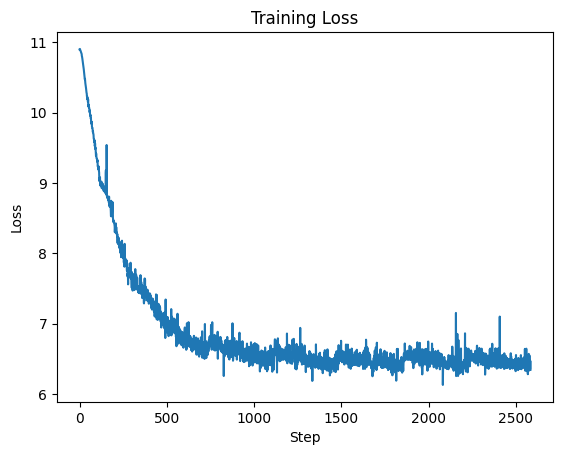

In [73]:
#after mlp only script 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log4.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

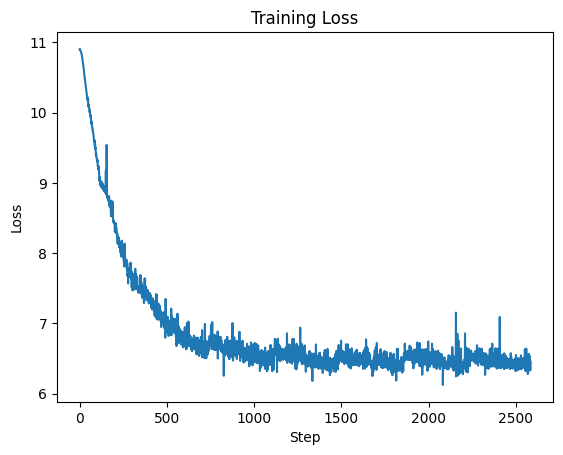

In [79]:
# after process group changes
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log5.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

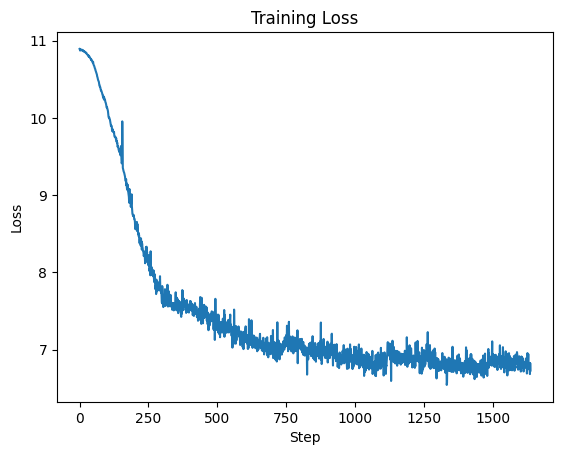

In [791]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log7.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

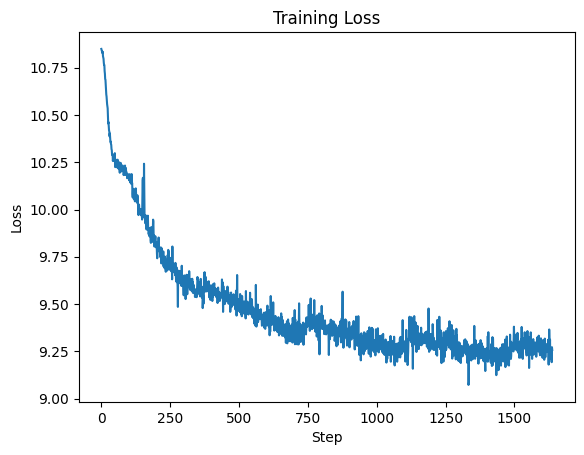

In [793]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log87.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

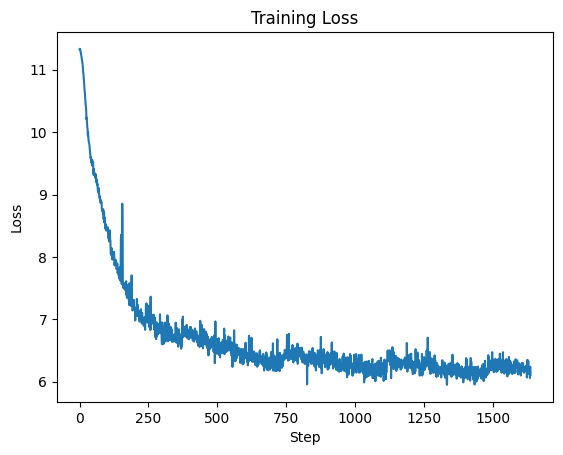

In [277]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log102.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

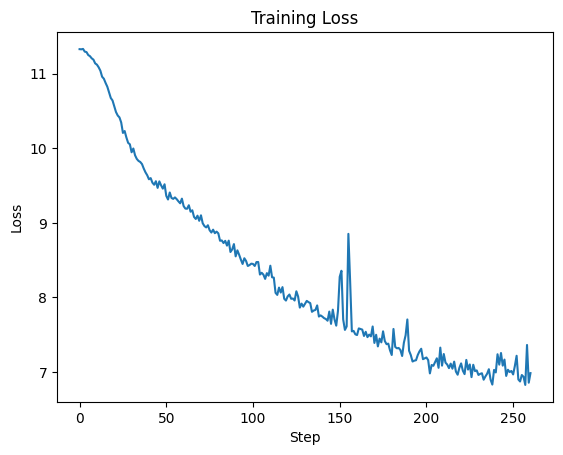

In [320]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log1.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

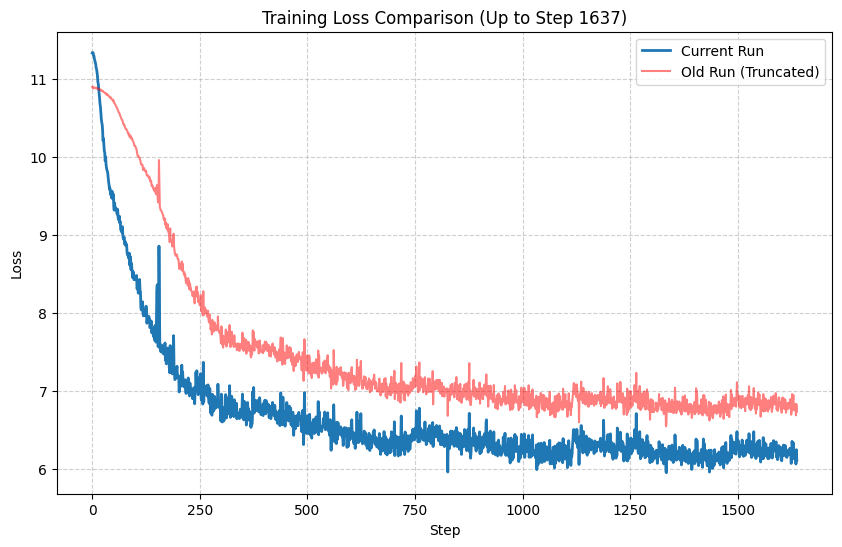

Avg. Throughput new: 46040.69915543711
Min Train Loss new: 5.948166
Min Val Loss new: 6.223662
Avg. Throughput old: 37349.7465271044
Min Train Loss old: 6.544059
Min Val Loss old: 6.837506


In [454]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log7.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log1.csv')

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "-", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())

print("Avg. Throughput old:",df_old['tok_per_sec'].mean())
print("Min Train Loss old:",df_old['loss'][:].min())
print("Min Val Loss old:",df_old['val_loss'].where(df_new['val_loss']!=(-1)).min())

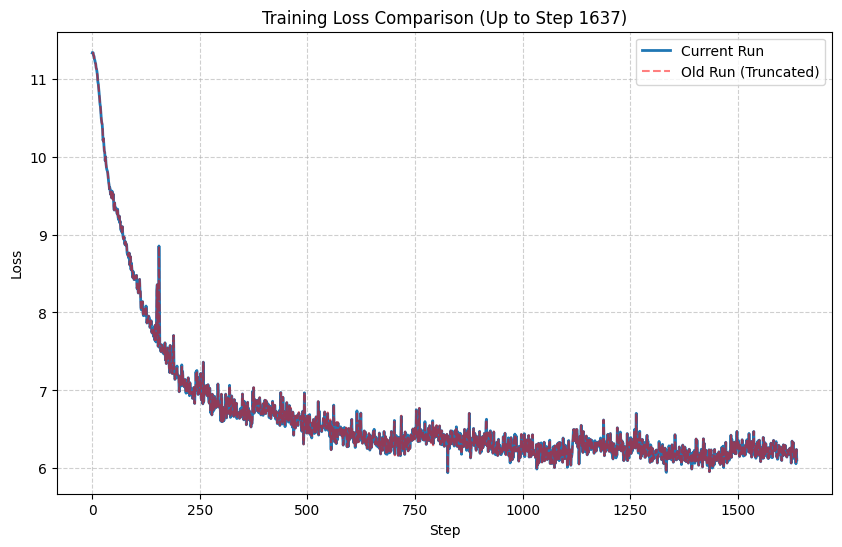

Avg. Throughput new: 47549.14508454212
Min Train Loss new: 5.944341
Min Val Loss new: 6.223601
Avg. Time new: 1383.7652628797314
Avg. Data Time new: 0.16476338949938948
Avg. Forward Time new: 383.7659928943834
Avg. Loss Time new: 40.26491115506715
Avg. Backward Time new: 908.4813858217339
Avg. clip_grad Time new: 37.23170529059829
Avg. Optimizer Time new: 1.8796896312576312
Avg. Tok_Emb Time new: 0.926390525030525
Avg. Pos_Emb Time new: 0.1524711697191697
Avg. Mlp Time new: 137.3948575805861
Avg. Ln_f Time new: 1.4874302124542125
Avg. LM Head Time new: 252.3491538162393

Avg. Throughput old: 46040.69915543711
Min Train Loss old: 5.948166
Min Val Loss old: 6.223662
Avg. Time old: 1430.0046136202686
Avg. Data Time old: 0.22151841758241758
Avg. Forward Time old: 387.23634951343104
Avg. Loss Time old: 40.26637118192917
Avg. Backward Time old: 919.6310023186812
Avg. clip_grad Time old: 37.22742807875458
Avg. Optimizer Time old: 33.345595455433454
Avg. Tok_Emb Time old: 0.9264759365079365
Av

In [89]:
#after madhu's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log1.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log2.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old['tok_per_sec'].mean())
print("Min Train Loss old:",df_old['loss'][:].min())
print("Min Val Loss old:",df_old['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old['dt_ms'].mean())
print("Avg. Data Time old:",df_old['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old['timer_lm_head'][:].mean())

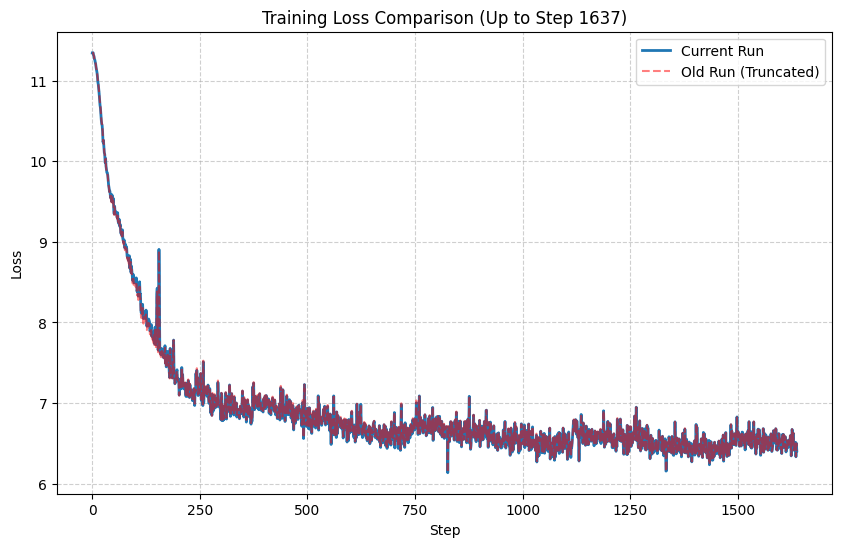

Avg. Throughput new: 41997.2816882674
Min Train Loss new: 6.135421
Min Val Loss new: 6.521286
Avg. Time new: 1567.2566368931623
Avg. Data Time new: 0.22236413186813186
Avg. Forward Time new: 474.00124583577536
Avg. Loss Time new: 40.26086446398046
Avg. Backward Time new: 985.9079653260075
Avg. clip_grad Time new: 37.387936230769235
Avg. Optimizer Time new: 14.999595526251525
Avg. Tok_Emb Time new: 4.070879238095238
Avg. Pos_Emb Time new: 0.1828453431013431
Avg. Mlp Time new: 226.890449958486
Avg. Ln_f Time new: 1.4875822222222221
Avg. LM Head Time new: 252.4064803956044

Avg. Throughput old: 47001.55144662698
Min Train Loss old: 6.139346
Min Val Loss old: 6.522188
Avg. Time old: 1399.7660452264954
Avg. Data Time old: 0.30258803418803415
Avg. Forward Time old: 387.55176482112336
Avg. Loss Time old: 40.24709984004884
Avg. Backward Time old: 907.3955748369963
Avg. clip_grad Time old: 37.232308153846155
Avg. Optimizer Time old: 14.99206396092796
Avg. Tok_Emb Time old: 4.071269137973138
Avg

In [145]:
#after madhu's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log14.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log19.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

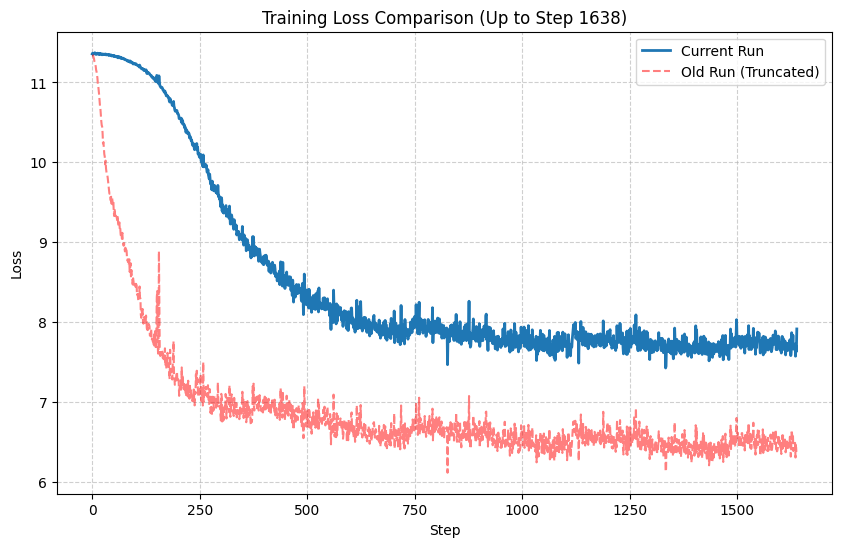

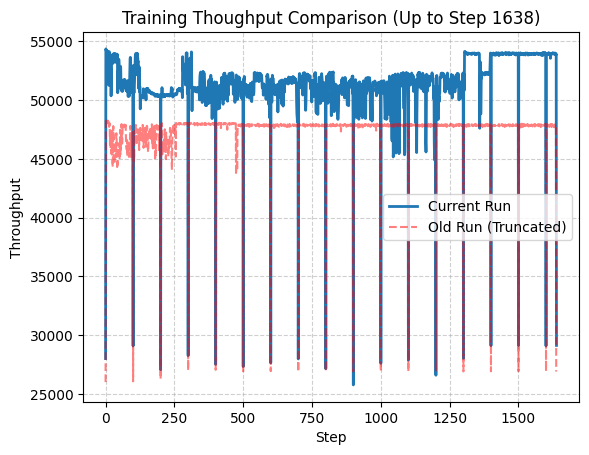

Avg. Throughput new: 51407.67780629286
Min Train Loss new: 7.4251
Min Val Loss new: 7.7384
Avg. Time new: 1281.4281829560705
Avg. Data Time new: 0.2887157730323368
Avg. Forward Time new: 428.5799432946919
Avg. Loss Time new: 40.30096185173886
Avg. Backward Time new: 754.4805463868213
Avg. clip_grad Time new: 34.18998582489323
Avg. Optimizer Time new: 11.331701476510068
Avg. Tok_Emb Time new: 4.072365159243441
Avg. Pos_Emb Time new: 0.18337747406955462
Avg. Mlp Time new: 179.0799286815131
Avg. Ln_f Time new: 1.4918128224527154
Avg. LM Head Time new: 252.5327335558267

Avg. Throughput old: 47463.302950357145
Min Train Loss old: 6.113817
Min Val Loss old: 6.49342
Avg. Time old: 1386.1042561056167
Avg. Data Time old: 0.15108231501831504
Avg. Forward Time old: 387.8982663705738
Avg. Loss Time old: 40.24801506166056
Avg. Backward Time old: 906.5516058504274
Avg. clip_grad Time old: 37.375924068376065
Avg. Optimizer Time old: 1.8789724444444444
Avg. Tok_Emb Time old: 4.028169748473748
Avg. Po

In [143]:
#after addmm's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log6.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log16.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

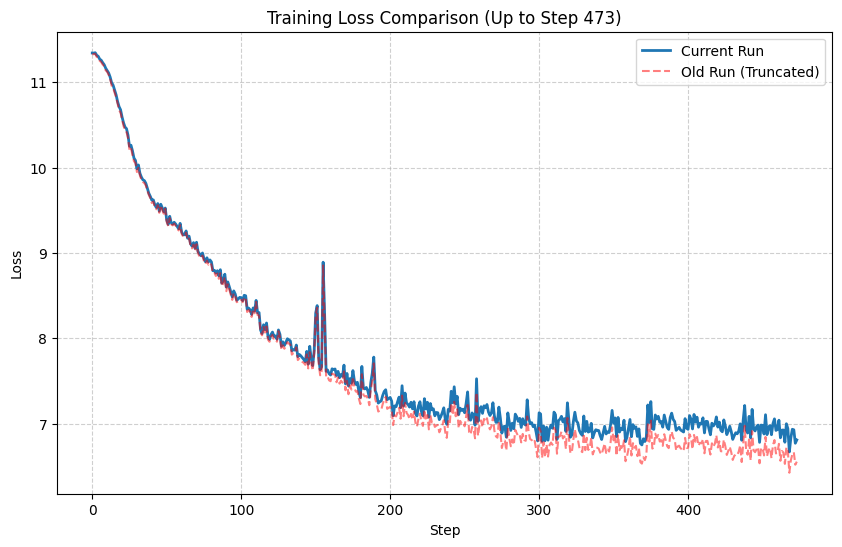

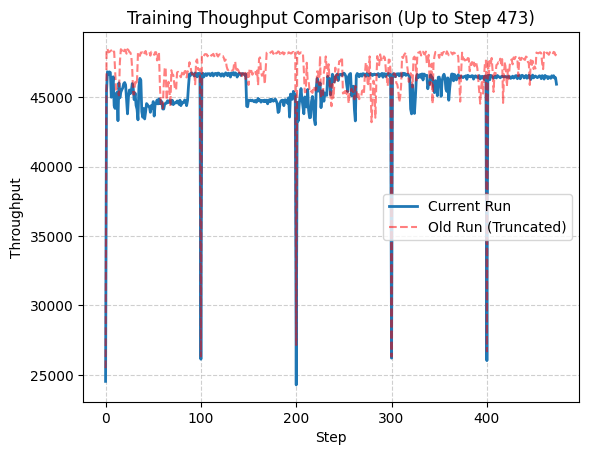

Avg. Throughput new: 45609.36508019831
Min Train Loss new: 6.668142
Min Val Loss new: 6.964633
Avg. Time new: 1442.908572683544
Avg. Data Time new: 0.22033275949367087
Avg. Forward Time new: 405.9214389789029
Avg. Loss Time new: 40.29493733755274
Avg. Backward Time new: 930.6156272194092
Avg. clip_grad Time new: 37.3689539556962
Avg. Optimizer Time new: 16.290601217299578
Avg. Tok_Emb Time new: 4.064721485232067
Avg. Pos_Emb Time new: 0.18443922362869197
Avg. Mlp Time new: 157.09870866033756
Avg. Ln_f Time new: 1.4864676455696202
Avg. LM Head Time new: 251.89815133755272

Avg. Throughput old: 46928.7944410443
Min Train Loss old: 6.424323
Min Val Loss old: 6.73404
Avg. Time old: 1402.3210240590718
Avg. Data Time old: 0.1689587848101266
Avg. Forward Time old: 387.22383551898736
Avg. Loss Time old: 40.30547146624473
Avg. Backward Time old: 923.7170037974684
Avg. clip_grad Time old: 37.207561044303795
Avg. Optimizer Time old: 1.88243976371308
Avg. Tok_Emb Time old: 0.9254231223628693
Avg. 

In [183]:
#after addmm's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log2.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log20.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

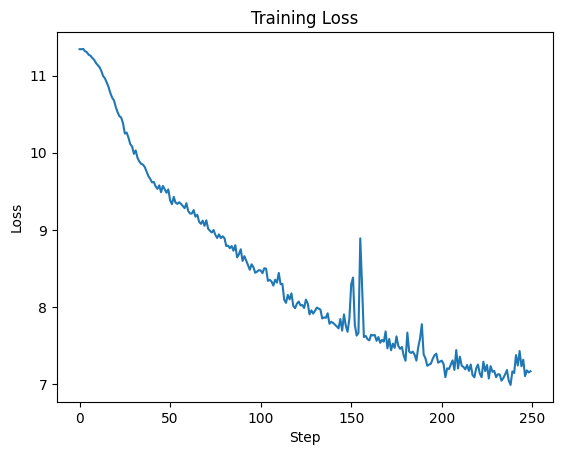

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log20.csv')

plt.plot(df['step'][:250].to_numpy(), df['loss'][:250].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

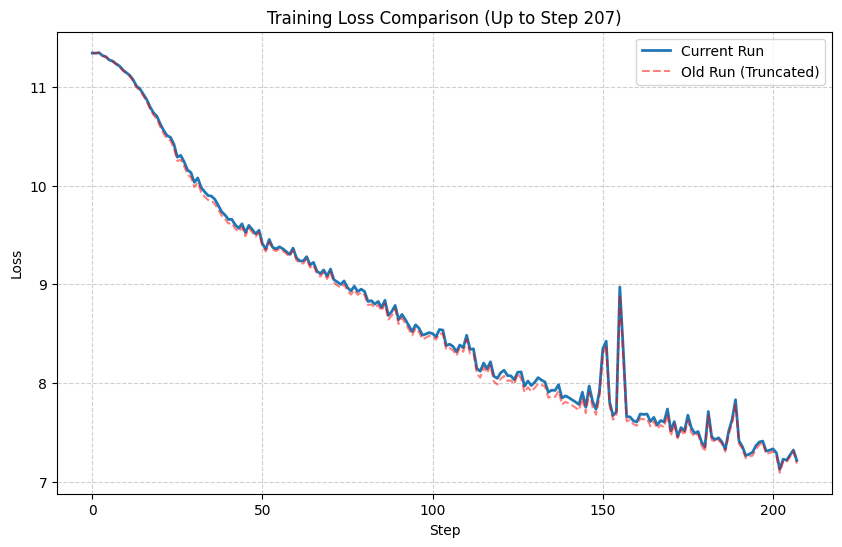

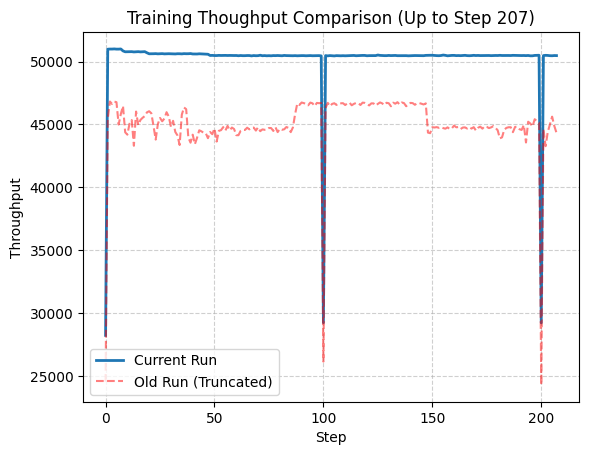

Avg. Throughput new: 50226.869560379804
Min Train Loss new: 7.126728
Min Val Loss new: 7.391259
Avg. Time new: 1310.7699444182692
Avg. Data Time new: 0.22297030769230772
Avg. Forward Time new: 336.76123286057697
Avg. Loss Time new: 40.26434841826923
Avg. Backward Time new: 863.1948123173077
Avg. clip_grad Time new: 40.039225100961545
Avg. Optimizer Time new: 16.09670922596154
Avg. Tok_Emb Time new: 4.150022615384615
Avg. Pos_Emb Time new: 0.17119815384615383
Avg. Mlp Time new: 89.62014097596155
Avg. Ln_f Time new: 1.4743532307692306
Avg. LM Head Time new: 251.72819420192306

Avg. Throughput old: 45040.451541206734
Min Train Loss old: 7.092654
Min Val Loss old: 7.360771
Avg. Time old: 1463.3472407211536
Avg. Data Time old: 0.22232107692307693
Avg. Forward Time old: 408.5613296778846
Avg. Loss Time old: 40.354823120192314
Avg. Backward Time old: 943.7811033942307
Avg. clip_grad Time old: 37.271857749999995
Avg. Optimizer Time old: 16.26573939423077
Avg. Tok_Emb Time old: 4.10697399999999

In [647]:
#after addmm's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log20.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log22.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

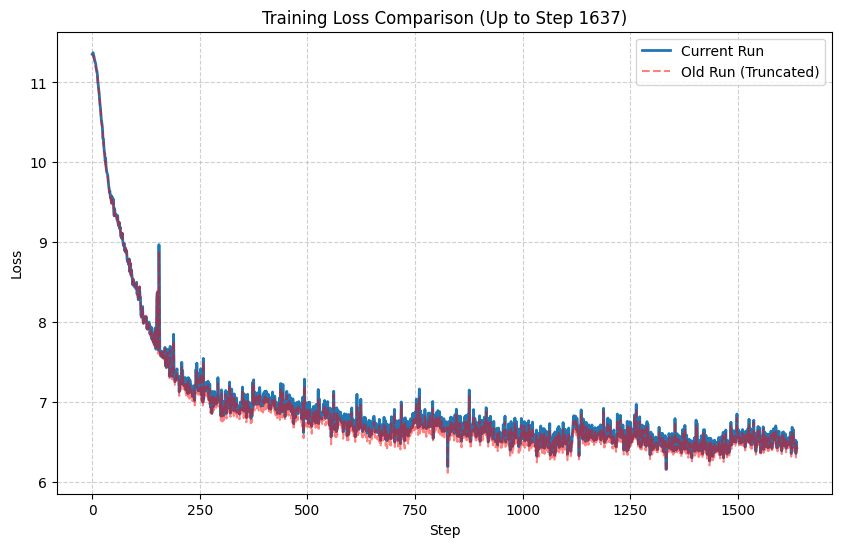

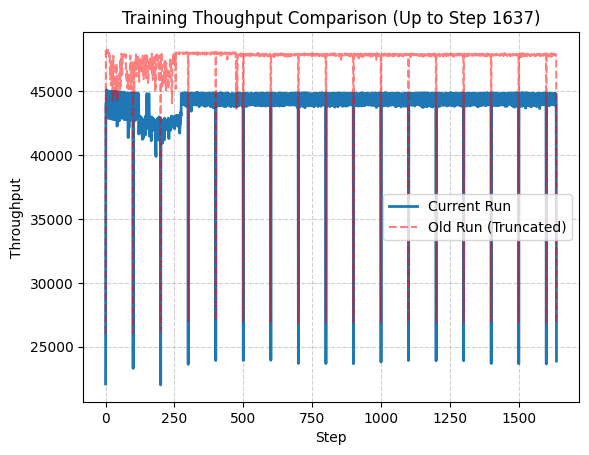

Avg. Throughput new: 44093.77470803602
Min Train Loss new: 6.156147
Min Val Loss new: 6.532338
Avg. Time new: 1493.4248910689864
Avg. Data Time new: 0.23406833699633703
Avg. Forward Time new: 474.7091581617826
Avg. Loss Time new: 40.26448635653236
Avg. Backward Time new: 911.4663074450549
Avg. clip_grad Time new: 37.23005814285714
Avg. Optimizer Time new: 14.986944566544567
Avg. Tok_Emb Time new: 4.071250012210013
Avg. Pos_Emb Time new: 0.18226774114774116
Avg. Mlp Time new: 227.82591378205126
Avg. Ln_f Time new: 1.486104791208791
Avg. LM Head Time new: 252.23846015873016

Avg. Throughput old: 47463.302950357145
Min Train Loss old: 6.113817
Min Val Loss old: 6.492063
Avg. Time old: 1386.1042561056167
Avg. Data Time old: 0.15108231501831504
Avg. Forward Time old: 387.8982663705738
Avg. Loss Time old: 40.24801506166056
Avg. Backward Time old: 906.5516058504274
Avg. clip_grad Time old: 37.375924068376065
Avg. Optimizer Time old: 1.8789724444444444
Avg. Tok_Emb Time old: 4.028169748473748


In [ ]:
#after backward hook method
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log6.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log1.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

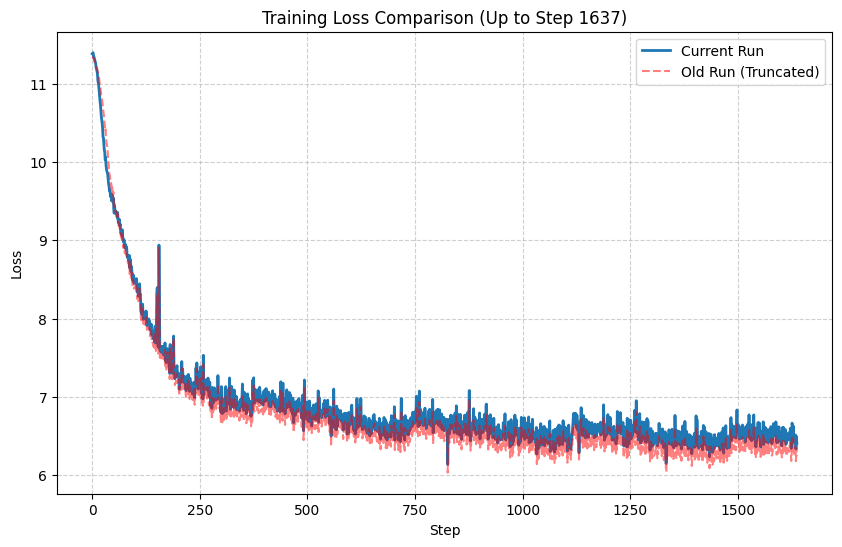

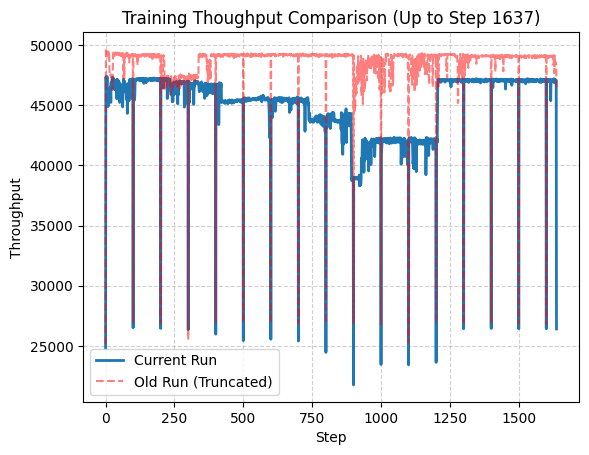

Avg. Throughput new: 45023.3429722961
Min Train Loss new: 6.139913
Min Val Loss new: 6.523186
Avg. Time new: 1464.6621550586078
Avg. Data Time new: 0.2466313846153846
Avg. Forward Time new: 405.0142562564102
Avg. Loss Time new: 40.302955873626374
Avg. Backward Time new: 953.9005313131868
Avg. clip_grad Time new: 37.39075654029304
Avg. Optimizer Time new: 15.001229597069596
Avg. Tok_Emb Time new: 4.071808898656898
Avg. Pos_Emb Time new: 0.18308887912087912
Avg. Mlp Time new: 156.18660396275948
Avg. Ln_f Time new: 1.4884753504273505
Avg. LM Head Time new: 252.4206017930403

Avg. Throughput old: 48533.45314930097
Min Train Loss old: 6.03402
Min Val Loss old: -1.0
Avg. Time old: 1355.9466947600733
Avg. Data Time old: 0.5471991404151404
Avg. Forward Time old: 409.79115762515266
Avg. Loss Time old: 40.46994881013431
Avg. Backward Time old: 839.0402359487179
Avg. clip_grad Time old: 37.540541749694746
Avg. Optimizer Time old: 16.31946942185592
Avg. Tok_Emb Time old: 4.0747897826617825
Avg. Po

In [1]:
#without  hook method
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log5.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

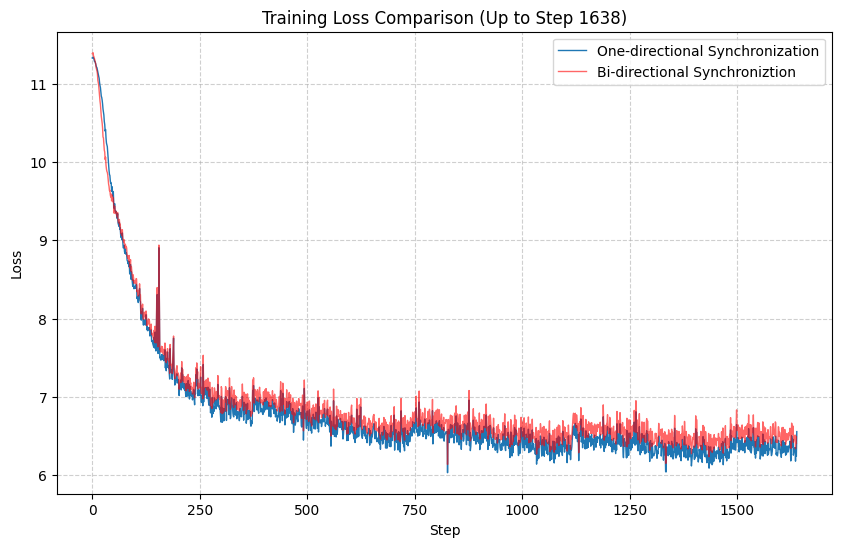

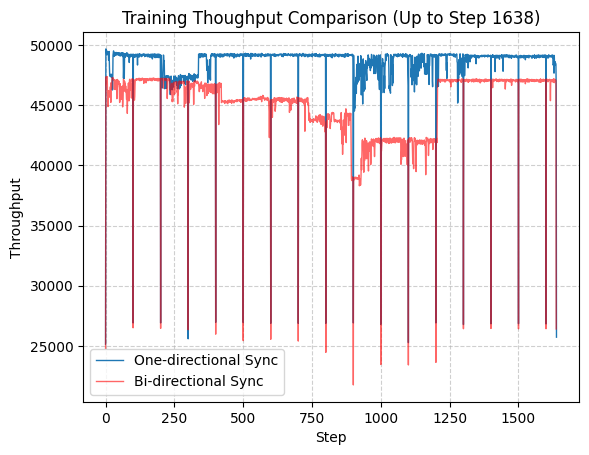

Max. Throughput new: 49671.723452
Avg. Throughput new: 48519.54031831788
Min Train Loss new: 6.03402
Min Val Loss new: 6.359128
Avg. Time new: 1356.673410438072
Avg. Data Time new: 0.5477284978645516
Avg. Forward Time new: 409.7946456705308
Avg. Loss Time new: 40.4699595899939
Avg. Backward Time new: 839.0408482190359
Avg. clip_grad Time new: 37.54055733007932
Avg. Optimizer Time new: 16.319473806589386
Avg. Tok_Emb Time new: 4.0806717071384995
Avg. Pos_Emb Time new: 0.20695095057962168
Avg. Mlp Time new: 160.4709187528981
Avg. Ln_f Time new: 1.5485406418547896
Avg. LM Head Time new: 252.48354041671755

Max. Throughput old: 47371.80019
Avg. Throughput old: 45023.3429722961
Min Train Loss old: 6.139913
Min Val Loss old: 6.523797
Avg. Time old: 1464.6621550586078
Avg. Data Time old: 0.2466313846153846
Avg. Forward Time old: 405.0142562564102
Avg. Loss Time old: 40.302955873626374
Avg. Backward Time old: 953.9005313131868
Avg. clip_grad Time old: 37.39075654029304
Avg. Optimizer Time old:

In [21]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log5.csv')
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='One-directional Synchronization', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Bi-directional Synchroniztion',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='One-directional Sync', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Bi-directional Sync',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

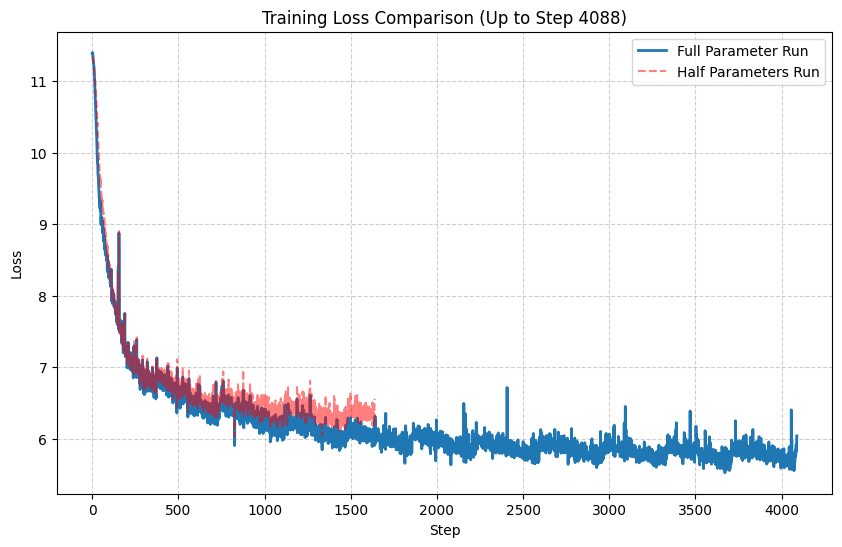

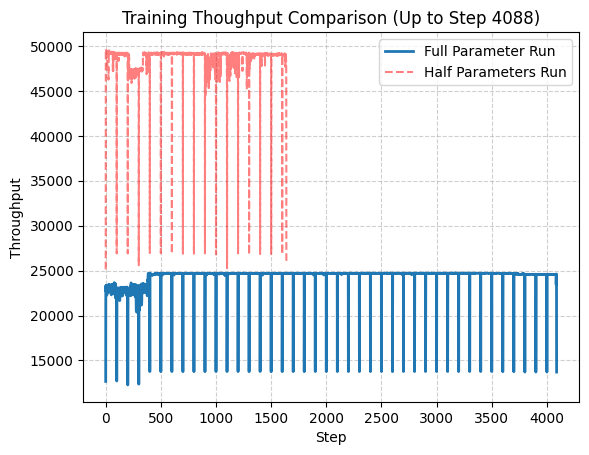

Max. Throughput Full Parameters: 24719.281762
Avg. Throughput Full Parameters: 24395.16696371142
Min Train Loss Full Parameters: 5.522089
Min Val Loss Full Parameters: 5.800086
Avg. Time Full Parameters: 2697.635412601125
Avg. Data Time Full Parameters: 0.2696706363414038
Avg. Forward Time Full Parameters: 818.3153947860112
Avg. Loss Time Full Parameters: 40.25267749425288
Avg. Backward Time Full Parameters: 1679.723141935192
Avg. clip_grad Time Full Parameters: 93.29320960601615
Avg. Optimizer Time Full Parameters: 43.549496455123496
Avg. Tok_Emb Time Full Parameters: 9.929930831010026
Avg. Pos_Emb Time Full Parameters: 0.3143295045243336
Avg. Mlp Time Full Parameters: 310.52067594693074
Avg. Ln_f Time Full Parameters: 2.173773828319882
Avg. LM Head Time Full Parameters: 446.5450913140132

Max. Throughput Half Parameters: 49671.723452
Avg. Throughput Half Parameters: 48519.54031831788
Min Train Loss Half Parameters: 6.03402
Min Val Loss Half Parameters: 6.359332
Avg. Time Half Paramet

In [3]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log12.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Full Parameter Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Half Parameters Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Full Parameter Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Half Parameters Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput Full Parameters:",df_new['tok_per_sec'].max())
print("Avg. Throughput Full Parameters:",df_new['tok_per_sec'].mean())
print("Min Train Loss Full Parameters:",df_new['loss'][:].min())
print("Min Val Loss Full Parameters:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time Full Parameters:",df_new['dt_ms'].mean())
print("Avg. Data Time Full Parameters:",df_new['timer_data'][:].mean())
print("Avg. Forward Time Full Parameters:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time Full Parameters:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time Full Parameters:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time Full Parameters:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time Full Parameters:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time Full Parameters:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time Full Parameters:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time Full Parameters:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time Full Parameters:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time Full Parameters:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput Half Parameters:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput Half Parameters:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss Half Parameters:",df_old_truncated['loss'][:].min())
print("Min Val Loss Half Parameters:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time Half Parameters:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time Half Parameters:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time Half Parameters:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time Half Parameters:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time Half Parameters:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time Half Parameters:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time Half Parameters:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time Half Parameters:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time Half Parameters:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time Half Parameters:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time Half Parameters:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time Half Parameters:",df_old_truncated['timer_lm_head'][:].mean())

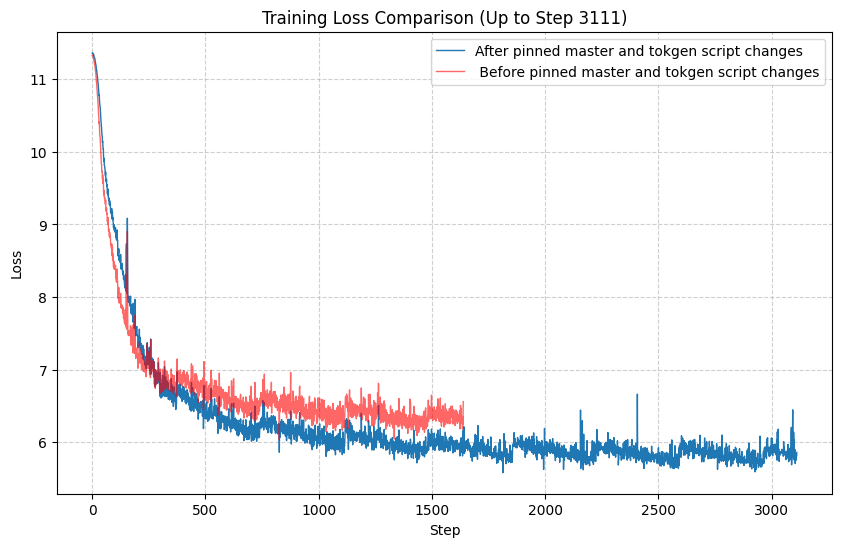

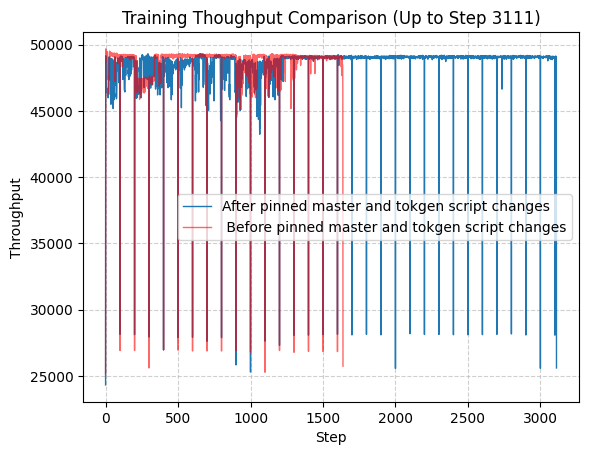

Max. Throughput new: 49308.437821
Avg. Throughput new: 48474.340731179625
Min Train Loss new: 5.579257
Min Val Loss new: 5.841373
Avg. Time new: 1357.1131434485862
Avg. Data Time new: 0.31920556298200514
Avg. Forward Time new: 372.00131980816195
Avg. Loss Time new: 40.16849405623393
Avg. Backward Time new: 833.7445476995501
Avg. clip_grad Time new: 70.66290242127249
Avg. Optimizer Time new: 28.923504822622103
Avg. Tok_Emb Time new: 0.9776505809768637
Avg. Pos_Emb Time new: 0.2569824267352185
Avg. Mlp Time new: 77.56951009125964
Avg. Ln_f Time new: 1.5023639794344472
Avg. LM Head Time new: 252.28502584158096

Max. Throughput old: 49671.723452
Avg. Throughput old: 48519.54031831788
Min Train Loss old: 6.03402
Min Val Loss old: 6.359332
Avg. Time old: 1356.673410438072
Avg. Data Time old: 0.5477284978645516
Avg. Forward Time old: 409.7946456705308
Avg. Loss Time old: 40.4699595899939
Avg. Backward Time old: 839.0408482190359
Avg. clip_grad Time old: 37.54055733007932
Avg. Optimizer Time o

In [366]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log22.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='After pinned master and tokgen script changes', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label=' Before pinned master and tokgen script changes',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='After pinned master and tokgen script changes', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Before pinned master and tokgen script changes',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

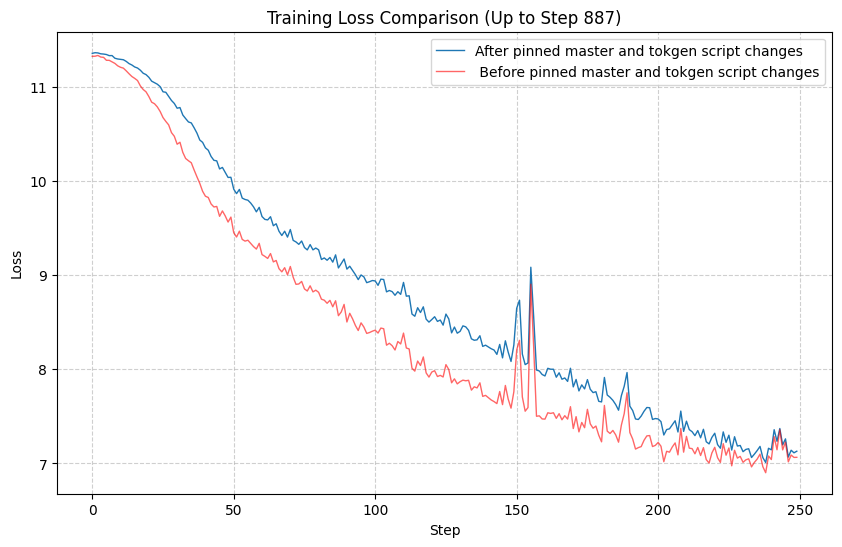

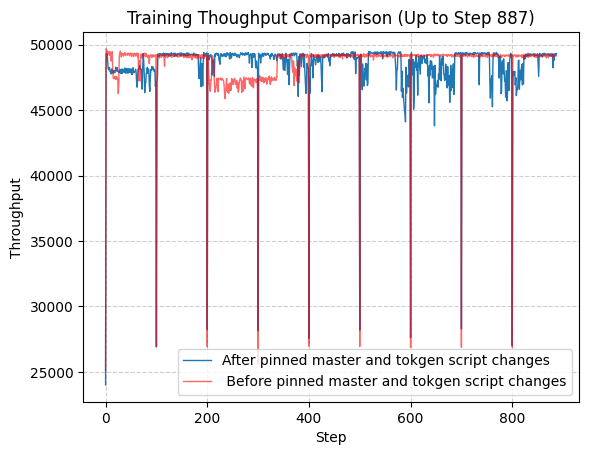

Max. Throughput new: 49477.487215
Avg. Throughput new: 48465.51359943242
Min Train Loss new: 5.854811
Min Val Loss new: 6.213547
Avg. Time new: 1357.4074625889639
Avg. Data Time new: 0.21930868468468467
Avg. Forward Time new: 373.2172032837838
Avg. Loss Time new: 40.160648984234236
Avg. Backward Time new: 833.4281879054054
Avg. clip_grad Time new: 70.63139704279278
Avg. Optimizer Time new: 28.94262030855856
Avg. Tok_Emb Time new: 0.9763255135135135
Avg. Pos_Emb Time new: 0.25638436036036033
Avg. Mlp Time new: 77.4055632759009
Avg. Ln_f Time new: 1.4975265585585587
Avg. LM Head Time new: 251.8789195698198

Max. Throughput old: 49671.723452
Avg. Throughput old: 48590.80096984121
Min Train Loss old: 6.03402
Min Val Loss old: 6.537271
Avg. Time old: 1354.2613001565317
Avg. Data Time old: 0.5522043963963964
Avg. Forward Time old: 408.78206149436943
Avg. Loss Time old: 40.46924539864865
Avg. Backward Time old: 838.6732895788289
Avg. clip_grad Time old: 37.520755959459464
Avg. Optimizer Time 

In [101]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log23.csv')
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'][:250], df_new['loss'][:250], label='After pinned master and tokgen script changes', linewidth=1)
plt.plot(df_old_truncated['step'][:250], df_old_truncated['loss'][:250], label=' Before pinned master and tokgen script changes',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='After pinned master and tokgen script changes', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Before pinned master and tokgen script changes',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

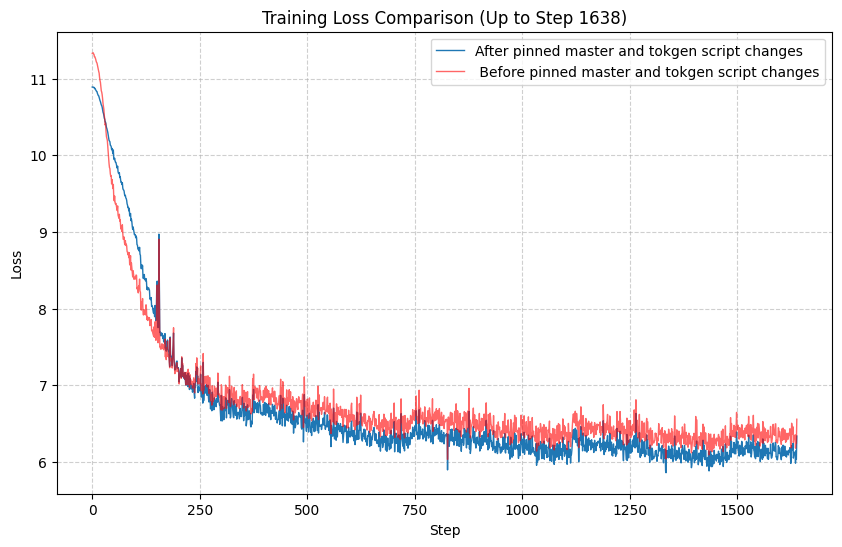

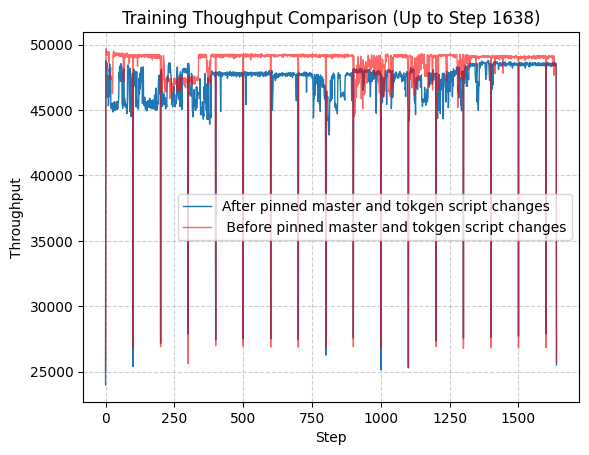

Max. Throughput new: 48765.510116
Avg. Throughput new: 47083.014991070784
Min Train Loss new: 5.861392
Min Val Loss new: 6.141391
Avg. Time new: 1397.7873736973763
Avg. Data Time new: 0.29546021720561316
Avg. Forward Time new: 395.32485892556434
Avg. Loss Time new: 40.20766927943869
Avg. Backward Time new: 897.9071400591824
Avg. clip_grad Time new: 37.433750842586946
Avg. Optimizer Time new: 14.632661456985968
Avg. Tok_Emb Time new: 0.979296292861501
Avg. Pos_Emb Time new: 0.26742128615009153
Avg. Mlp Time new: 77.66739240207444
Avg. Ln_f Time new: 1.5077073923123856
Avg. LM Head Time new: 255.08079725137281

Max. Throughput old: 49671.723452
Avg. Throughput old: 48519.54031831788
Min Train Loss old: 6.03402
Min Val Loss old: 6.359128
Avg. Time old: 1356.673410438072
Avg. Data Time old: 0.5477284978645516
Avg. Forward Time old: 409.7946456705308
Avg. Loss Time old: 40.4699595899939
Avg. Backward Time old: 839.0408482190359
Avg. clip_grad Time old: 37.54055733007932
Avg. Optimizer Time 

In [983]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log36.csv')
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='After pinned master and tokgen script changes', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label=' Before pinned master and tokgen script changes',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='After pinned master and tokgen script changes', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Before pinned master and tokgen script changes',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

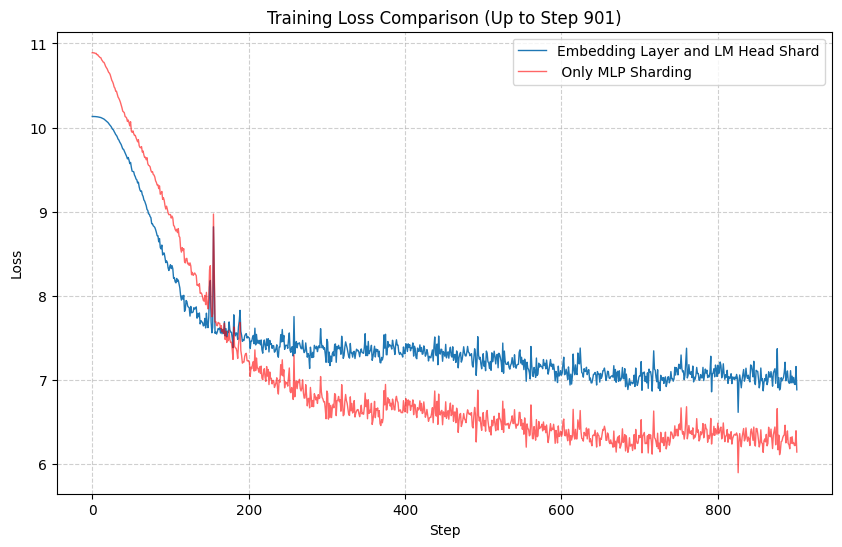

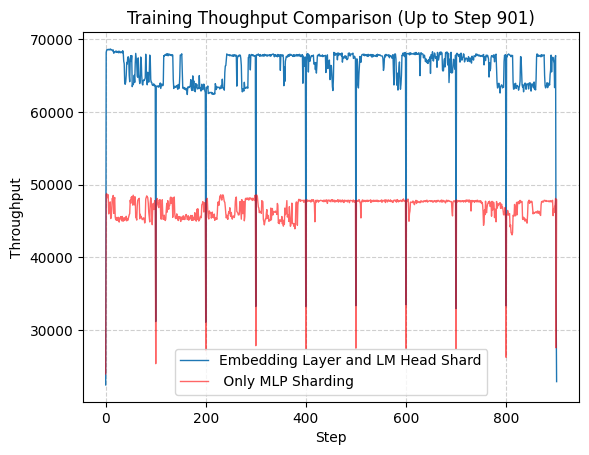

Max. Throughput Embed & LMHead Shard: 68661.765698
Avg. Throughput Embed & LMHead Shard: 65978.27155508204
Min Train Loss Embed & LMHead Shard: 6.615904
Min Val Loss Embed & LMHead Shard: 7.016534
Avg. Time Embed & LMHead Shard: 1001.975609905765
Avg. Data Time Embed & LMHead Shard: 0.2465529756097561
Avg. Forward Time Embed & LMHead Shard: 401.40921037583144
Avg. Loss Time Embed & LMHead Shard: 20.399241849223948
Avg. Backward Time Embed & LMHead Shard: 535.850219977827
Avg. clip_grad Time Embed & LMHead Shard: 20.65613982261641
Avg. Optimizer Time Embed & LMHead Shard: 8.781663254988914
Avg. Tok_Emb Time Embed & LMHead Shard: 66.7189552827051
Avg. Pos_Emb Time Embed & LMHead Shard: 0.27289532594235033
Avg. Mlp Time Embed & LMHead Shard: 77.91906957538802
Avg. Ln_f Time Embed & LMHead Shard: 1.5101444611973394
Avg. LM Head Time Embed & LMHead Shard: 232.40122146563192

Max. Throughput MLP Only Shard: 48754.430001
Avg. Throughput MLP Only Shard: 46730.8712508215
Min Train Loss MLP Only

In [569]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log18.csv')
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log36.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Embedding Layer and LM Head Shard', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label=' Only MLP Sharding',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Embedding Layer and LM Head Shard', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Only MLP Sharding',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput Embed & LMHead Shard:",df_new['tok_per_sec'].max())
print("Avg. Throughput Embed & LMHead Shard:",df_new['tok_per_sec'].mean())
print("Min Train Loss Embed & LMHead Shard:",df_new['loss'][:].min())
print("Min Val Loss Embed & LMHead Shard:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time Embed & LMHead Shard:",df_new['dt_ms'].mean())
print("Avg. Data Time Embed & LMHead Shard:",df_new['timer_data'][:].mean())
print("Avg. Forward Time Embed & LMHead Shard:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time Embed & LMHead Shard:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time Embed & LMHead Shard:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time Embed & LMHead Shard:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time Embed & LMHead Shard:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time Embed & LMHead Shard:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time Embed & LMHead Shard:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time Embed & LMHead Shard:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time Embed & LMHead Shard:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time Embed & LMHead Shard:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput MLP Only Shard:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput MLP Only Shard:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss MLP Only Shard:",df_old_truncated['loss'][:].min())
print("Min Val Loss MLP Only Shard:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time MLP Only Shard:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time MLP Only Shard:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time MLP Only Shard:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time MLP Only Shard:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time MLP Only Shard:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time MLP Only Shard:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time MLP Only Shard:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time MLP Only Shard:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time MLP Only Shard:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time MLP Only Shard:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time MLP Only Shard:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time MLP Only Shard:",df_old_truncated['timer_lm_head'][:].mean())

In [1339]:
import tiktoken

enc = tiktoken.get_encoding("gpt2")

# s = "31373 11 616 1438 318 220 467 319 262 1578 1829 13 198 2437 466 884 1402 37346 4104 523 3049 30 7214 257 8475 351 1342 621 838 583 1247 24048 13 13786 340 257 3128 13 198 1890 477 286 6638 5070 2450 319 2092 5520 284 3128"
# tokens = s.split(" ")
# tokens = [int(i) for i in tokens]
# tokens = [50256 ,618, 262, 11, 262, 416, 262, 257 ,286 ,262, 290, 584, 286, 262, 14 ,286 ,466, 287, 262, 286, 262, 262, 290, 262 ,13 ,198, 11, 357 ,13 ,198, 464, 13]

# decoded = enc.decode(tokens)
tokens = "15496 11 314 1101 281 9552 2746 11 37 44 13 38 40 47 26 21 6 39 10 43 33 40 46 27 24 15 22 3 25 22 28 16 13 13 24 2 22 18 15 35 48 40 15 4 18 40 7 17 45 47 45 41 40 40 31 19 40 8 0 13"
tokens1 = "15496 11 314 1101 281 9552 2746 11 33 45 12 33 7 46 28 29 14 21 13 6 2 27 26 44 2 3 32 18 14 26 41 45 4 3 43 35 44 43 45 41 9 24 18 5 48 18 34 18 13 37 4 14 13 45 46 17 1 23 19 5" 
tokens2 = "15496 11 314 1101 281 9552 2746 11 36 23 36 8 4 40 23 10 44 25 43 34 38 35 6 45 26 24 4 3 26 42 0 10 10 23 36 31 14 46 11 48 9 31 31 16 21 17 11 49 15 21 46 31 12 45 36 27 33 49 7 21"
tokens3 = "15496 11 314 1101 281 9552 2746 11 49 19 8 22 11 27 40 24 5 21 29 24 24 39 1 48 4 10 28 9 0 3 8 38 45 48 28 1 16 49 47 22 11 27 46 18 44 5 43 19 32 41 9 14 34 22 8 28 33 1 46 21"


# tokens = ""

# tokens1 = "40 1101 422 45630 64 11 257 2219 290 373 1760 284 2222 606 13 1649 281 3220 13 921 481 423 587 1043 319 287 428 640 290 379 1551 1936 812 11 564 250 818 262 1438 329 345 389 11 447 247 82 547 477 2974 290 257 1728 2489 11 290 262 717 12 1867 340"
# tokens2 = "27544 286 45630 64 318 1744 13 1867 318 530 329 1123 1339 11 290 262 1748 11 393 287 262 749 1593 2597 287 584 5107 319 284 262 198 1026 338 1918 286 262 1903 4302 4302 290 340 13 1119 460 307 1695 284 262 691 284 262 976 614 1248 2598 12 3106 290 262 749"
# tokens3 = "1150 291 500 2214 318 257 1310 286 262 1438 329 257 1641 357 392 428 2708 356 423 284 262 564 250 40 12 21 91 42 12 1867 484 531 287 262 717 12 69 571 278 11 262 976 1243 13 198 1135 2227 11 407 307 257 1256 286 262 2656 2587 11 257 1402 17794"


token_ids = tokens.split(" ")
token_ids1 = tokens1.split(" ")
token_ids2 = tokens2.split(" ")
token_ids3 = tokens3.split(" ")
print("COUNT", len(token_ids))

total = []
total.append(token_ids)
total.append(token_ids1)
total.append(token_ids2)
total.append(token_ids3)
# print(total)
# total = mid.append(token_ids2)

total = [[int(j) for j in i] for i in total]
# print(total)

# for i in range(len(token_ids)):
#     for j in range(i):
#         token_ids[]

# Decode back to string
for sample in range(len(total)):
    decoded_text = enc.decode(total[sample])
    print(f"\nDecoded {sample}: {decoded_text}\n")



COUNT 60

Decoded 0: Hello, I'm an AI model,FM.GIP;6'H+LBIO<907$:7=1..9#730DQI0%3I(2NPNJII@4I)!.


Decoded 1: Hello, I'm an AI model,BN-B(O=>/6.'#<;M#$A3/;JN%$LDMLNJ*93&Q3C3.F%/.NO2"84&


Decoded 2: Hello, I'm an AI model,E8E)%I8+M:LCGD'N;9%$;K!++8E@/O,Q*@@162,R06O@-NE<BR(6


Decoded 3: Hello, I'm an AI model,R4)7,<I9&6>99H"Q%+=*!$)GNQ="1RP7,<O3M&L4AJ*/C7)=B"O6



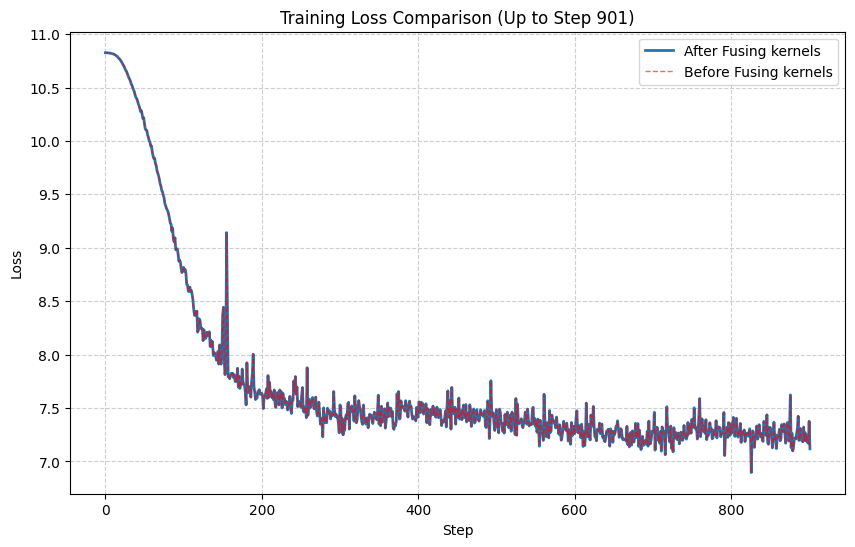

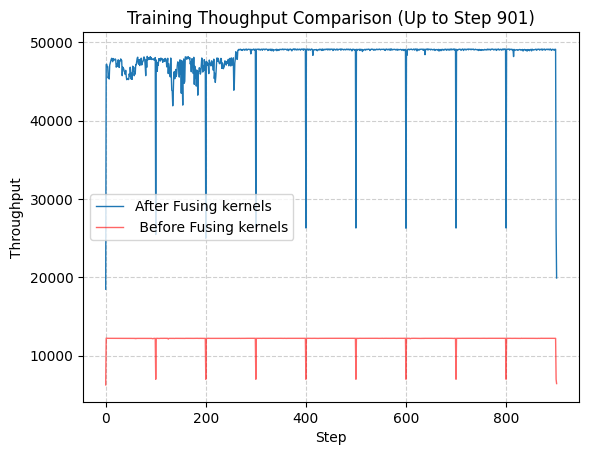

Max. Throughput new: 49162.166102
Avg. Throughput new: 48170.118065279385
Min Train Loss new: 6.89548
Min Val Loss new: 7.239554
Avg. Time new: 1369.3594777250555
Avg. Data Time new: 0.2672129135254989
Avg. Forward Time new: 370.6503291286032
Avg. Loss Time new: 106.49405441130821
Avg. Backward Time new: 845.9983589268293
Avg. clip_grad Time new: 20.657847022172948
Avg. Optimizer Time new: 8.764523068736143
Avg. Tok_Emb Time new: 37.868492727272724
Avg. Pos_Emb Time new: 0.27583443015521064
Avg. Mlp Time new: 77.77810913192904
Avg. Ln_f Time new: 1.5019565764966742
Avg. LM Head Time new: 232.05879112638578

Max. Throughput old: 12249.973418
Avg. Throughput old: 12158.93756707428
Min Train Loss old: 6.893974
Min Val Loss old: 7.239386
Avg. Time old: 5412.073968662971
Avg. Data Time old: 0.2404599911308204
Avg. Forward Time old: 389.6900622505544
Avg. Loss Time old: 1228.2767530321507
Avg. Backward Time old: 3713.5112580665195
Avg. clip_grad Time old: 20.53425872062084
Avg. Optimizer Tim

In [573]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log29.csv')
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log15.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='After Fusing kernels', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Before Fusing kernels',linewidth=1, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='After Fusing kernels', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Before Fusing kernels',linewidth=1, linestyle = "-", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())